<a href="https://colab.research.google.com/github/Ritik-8567/DS06/blob/main/DS_06.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [16]:
df=pd.read_csv('/content/flipkart_com-ecommerce_sample.csv')
df.head()

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
0,c2d766ca982eca8304150849735ffef9,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2FF9KEDEFGF,999.0,379.0,"[""http://img5a.flixcart.com/image/short/u/4/a/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
1,7f7036a6d550aaa89d34c77bd39a5e48,2016-03-25 22:59:23 +0000,http://www.flipkart.com/fabhomedecor-fabric-do...,FabHomeDecor Fabric Double Sofa Bed,"[""Furniture >> Living Room Furniture >> Sofa B...",SBEEH3QGU7MFYJFY,32157.0,22646.0,"[""http://img6a.flixcart.com/image/sofa-bed/j/f...",False,FabHomeDecor Fabric Double Sofa Bed (Finish Co...,No rating available,No rating available,FabHomeDecor,"{""product_specification""=>[{""key""=>""Installati..."
2,f449ec65dcbc041b6ae5e6a32717d01b,2016-03-25 22:59:23 +0000,http://www.flipkart.com/aw-bellies/p/itmeh4grg...,AW Bellies,"[""Footwear >> Women's Footwear >> Ballerinas >...",SHOEH4GRSUBJGZXE,999.0,499.0,"[""http://img5a.flixcart.com/image/shoe/7/z/z/r...",False,Key Features of AW Bellies Sandals Wedges Heel...,No rating available,No rating available,AW,"{""product_specification""=>[{""key""=>""Ideal For""..."
3,0973b37acd0c664e3de26e97e5571454,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2F6HUZMQ6SJ,699.0,267.0,"[""http://img5a.flixcart.com/image/short/6/2/h/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
4,bc940ea42ee6bef5ac7cea3fb5cfbee7,2016-03-25 22:59:23 +0000,http://www.flipkart.com/sicons-all-purpose-arn...,Sicons All Purpose Arnica Dog Shampoo,"[""Pet Supplies >> Grooming >> Skin & Coat Care...",PSOEH3ZYDMSYARJ5,220.0,210.0,"[""http://img5a.flixcart.com/image/pet-shampoo/...",False,Specifications of Sicons All Purpose Arnica Do...,No rating available,No rating available,Sicons,"{""product_specification""=>[{""key""=>""Pet Type"",..."


In [18]:
df.shape

(20002, 15)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20002 entries, 0 to 20001
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   uniq_id                  20000 non-null  object 
 1   crawl_timestamp          20000 non-null  object 
 2   product_url              20000 non-null  object 
 3   product_name             20000 non-null  object 
 4   product_category_tree    20000 non-null  object 
 5   pid                      20000 non-null  object 
 6   retail_price             19922 non-null  float64
 7   discounted_price         19922 non-null  float64
 8   image                    19997 non-null  object 
 9   is_FK_Advantage_product  20000 non-null  object 
 10  description              19998 non-null  object 
 11  product_rating           20000 non-null  object 
 12  overall_rating           20000 non-null  object 
 13  brand                    14136 non-null  object 
 14  product_specifications

In [20]:
df.describe()

,retail_price,discounted_price
count,19922.000000,19922.000000
mean,2979.206104,1973.401767
std,9009.639341,7333.586040
min,35.000000,35.000000
25%,666.000000,350.000000
50%,1040.000000,550.000000
75%,1999.000000,999.000000
max,571230.000000,571230.000000


In [21]:
df.nunique()

uniq_id                    20000
crawl_timestamp              371
product_url                20000
product_name               12676
product_category_tree       6466
pid                        19998
retail_price                2247
discounted_price            2448
image                      18589
is_FK_Advantage_product        2
description                17539
product_rating                36
overall_rating                36
brand                       3499
product_specifications     18825
dtype: int64

In [22]:
len(df.columns)

15

In [24]:
df.isnull().sum()

uniq_id                       2
crawl_timestamp               2
product_url                   2
product_name                  2
product_category_tree         2
pid                           2
retail_price                 80
discounted_price             80
image                         5
is_FK_Advantage_product       2
description                   4
product_rating                2
overall_rating                2
brand                      5866
product_specifications       16
dtype: int64

In [25]:
df['product_rating'].fillna(-1, inplace=True)
df['overall_rating'].fillna(-1, inplace=True)

In [26]:
df['product_rating'] = pd.to_numeric(df['product_rating'], errors='coerce')
df['overall_rating'] = pd.to_numeric(df['overall_rating'], errors='coerce')

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20002 entries, 0 to 20001
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   uniq_id                  20000 non-null  object 
 1   crawl_timestamp          20000 non-null  object 
 2   product_url              20000 non-null  object 
 3   product_name             20000 non-null  object 
 4   product_category_tree    20000 non-null  object 
 5   pid                      20000 non-null  object 
 6   retail_price             19922 non-null  float64
 7   discounted_price         19922 non-null  float64
 8   image                    19997 non-null  object 
 9   is_FK_Advantage_product  20000 non-null  object 
 10  description              19998 non-null  object 
 11  product_rating           1851 non-null   float64
 12  overall_rating           1851 non-null   float64
 13  brand                    14136 non-null  object 
 14  product_specifications

In [28]:
df.columns

Index(['uniq_id', 'crawl_timestamp', 'product_url', 'product_name',
       'product_category_tree', 'pid', 'retail_price', 'discounted_price',
       'image', 'is_FK_Advantage_product', 'description', 'product_rating',
       'overall_rating', 'brand', 'product_specifications'],
      dtype='object')

In [ ]:
#Convert timestamps to datetime objects
df['crawl_timestamp'] = pd.to_datetime(df['crawl_timestamp'])
df

In [30]:
#Standardize text data
df['product_name'] = df['product_name'].str.lower()
df

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
0,c2d766ca982eca8304150849735ffef9,2016-03-25 22:59:23+00:00,http://www.flipkart.com/alisha-solid-women-s-c...,alisha solid women's cycling shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2FF9KEDEFGF,999.0,379.0,"[""http://img5a.flixcart.com/image/short/u/4/a/...",False,Key Features of Alisha Solid Women's Cycling S...,NaN,NaN,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
1,7f7036a6d550aaa89d34c77bd39a5e48,2016-03-25 22:59:23+00:00,http://www.flipkart.com/fabhomedecor-fabric-do...,fabhomedecor fabric double sofa bed,"[""Furniture >> Living Room Furniture >> Sofa B...",SBEEH3QGU7MFYJFY,32157.0,22646.0,"[""http://img6a.flixcart.com/image/sofa-bed/j/f...",False,FabHomeDecor Fabric Double Sofa Bed (Finish Co...,NaN,NaN,FabHomeDecor,"{""product_specification""=>[{""key""=>""Installati..."
2,f449ec65dcbc041b6ae5e6a32717d01b,2016-03-25 22:59:23+00:00,http://www.flipkart.com/aw-bellies/p/itmeh4grg...,aw bellies,"[""Footwear >> Women's Footwear >> Ballerinas >...",SHOEH4GRSUBJGZXE,999.0,499.0,"[""http://img5a.flixcart.com/image/shoe/7/z/z/r...",False,Key Features of AW Bellies Sandals Wedges Heel...,NaN,NaN,AW,"{""product_specification""=>[{""key""=>""Ideal For""..."
3,0973b37acd0c664e3de26e97e5571454,2016-03-25 22:59:23+00:00,http://www.flipkart.com/alisha-solid-women-s-c...,alisha solid women's cycling shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2F6HUZMQ6SJ,699.0,267.0,"[""http://img5a.flixcart.com/image/short/6/2/h/...",False,Key Features of Alisha Solid Women's Cycling S...,NaN,NaN,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
4,bc940ea42ee6bef5ac7cea3fb5cfbee7,2016-03-25 22:59:23+00:00,http://www.flipkart.com/sicons-all-purpose-arn...,sicons all purpose arnica dog shampoo,"[""Pet Supplies >> Grooming >> Skin & Coat Care...",PSOEH3ZYDMSYARJ5,220.0,210.0,"[""http://img5a.flixcart.com/image/pet-shampoo/...",False,Specifications of Sicons All Purpose Arnica Do...,NaN,NaN,Sicons,"{""product_specification""=>[{""key""=>""Pet Type"",..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19997,93e9d343837400ce0d7980874ece471c,2015-12-01 10:15:43+00:00,http://www.flipkart.com/elite-collection-mediu...,elite collection medium acrylic sticker,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",STIE7VAYDKQZEBSD,1299.0,999.0,"[""http://img5a.flixcart.com/image/sticker/b/s/...",False,Buy Elite Collection Medium Acrylic Sticker fo...,NaN,NaN,Elite Collection,"{""product_specification""=>[{""key""=>""Number of ..."
19998,669e79b8fa5d9ae020841c0c97d5e935,2015-12-01 10:15:43+00:00,http://www.flipkart.com/elite-collection-mediu...,elite collection medium acrylic sticker,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",STIE8YSVEPPCZ42Y,1499.0,1199.0,"[""http://img5a.flixcart.com/image/sticker/4/2/...",False,Buy Elite Collection Medium Acrylic Sticker fo...,NaN,NaN,Elite Collection,"{""product_specification""=>[{""key""=>""Number of ..."
19999,cb4fa87a874f715fff567f7b7b3be79c,2015-12-01 10:15:43+00:00,http://www.flipkart.com/elite-collection-mediu...,elite collection medium acrylic sticker,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",STIE88KN9ZDSGZKY,1499.0,999.0,"[""http://img6a.flixcart.com/image/sticker/z/k/...",False,Buy Elite Collection Medium Acrylic Sticker fo...,NaN,NaN,Elite Collection,"{""product_specification""=>[{""key""=>""Number of ..."
20000,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.0,-1.0,NaN,NaN


In [33]:
print(df["brand"].nunique())
df["brand"].unique()

3499


array(['Alisha', 'FabHomeDecor', 'AW', ..., 'Oren Empower', 'Uberlyfe',
       'Fun To See'], dtype=object)

In [34]:
df=df.groupby(by='brand').mean()
df

<ipython-input-34-988709b2cca0>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df=df.groupby(by='brand').mean()


,retail_price,discounted_price,product_rating,overall_rating
brand,,,,
1OAK,849.000000,637.000000,NaN,NaN
3D Mat,7250.000000,6999.000000,NaN,NaN
3a AUTOCARE,2580.434783,1827.826087,NaN,NaN
3a Autocare,2650.500000,1783.000000,4.5,4.5
3kFactory,399.000000,174.000000,NaN,NaN
...,...,...,...,...
youniqueshop,810.000000,640.000000,NaN,NaN
zDelhi.com,4499.000000,3999.000000,5.0,5.0
zaidis,150.000000,129.000000,NaN,NaN


<Axes: >

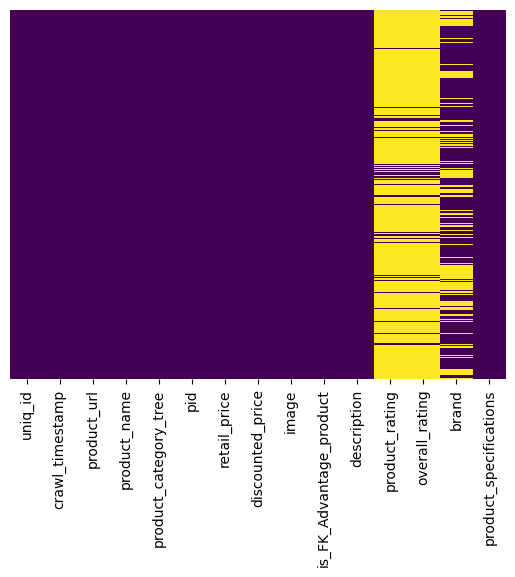

In [31]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

<ipython-input-32-aa4f4450a243>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr())


<Axes: >

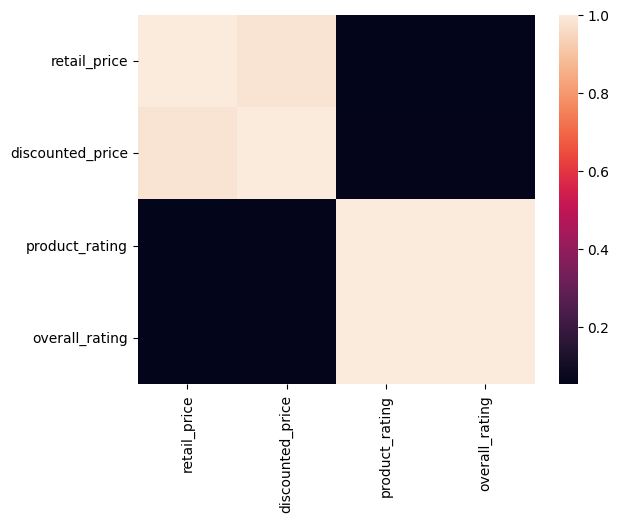

In [32]:
sns.heatmap(df.corr())

In [35]:
df.sum()

retail_price        8.022445e+06
discounted_price    5.254161e+06
product_rating      1.534048e+03
overall_rating      1.534048e+03
dtype: float64

In [36]:
max_discounted_price = df['discounted_price'].quantile(0.95)
df['discounted_price'] = df['discounted_price'].clip(upper=max_discounted_price)

In [37]:
max_discounted_price

4549.799999999999

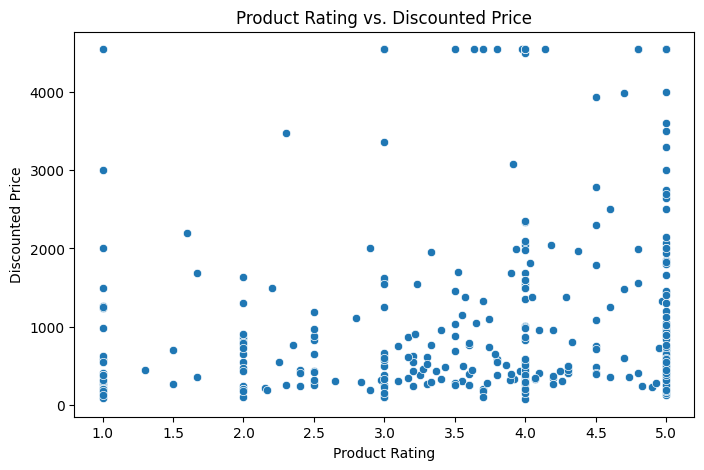

In [38]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x='product_rating', y='discounted_price', data=df)
plt.title("Product Rating vs. Discounted Price")
plt.xlabel("Product Rating")
plt.ylabel("Discounted Price")
plt.show()

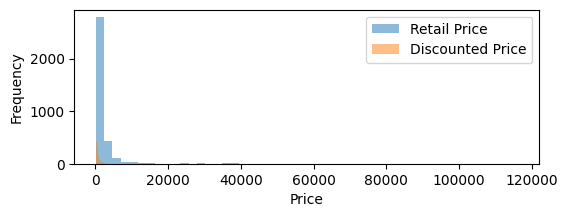

In [46]:
plt.figure(figsize=(6, 2))
plt.hist(df['retail_price'], bins=50, alpha=0.5, label='Retail Price')
plt.hist(df['discounted_price'], bins=50, alpha=0.5, label='Discounted Price')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.legend()
plt.show()

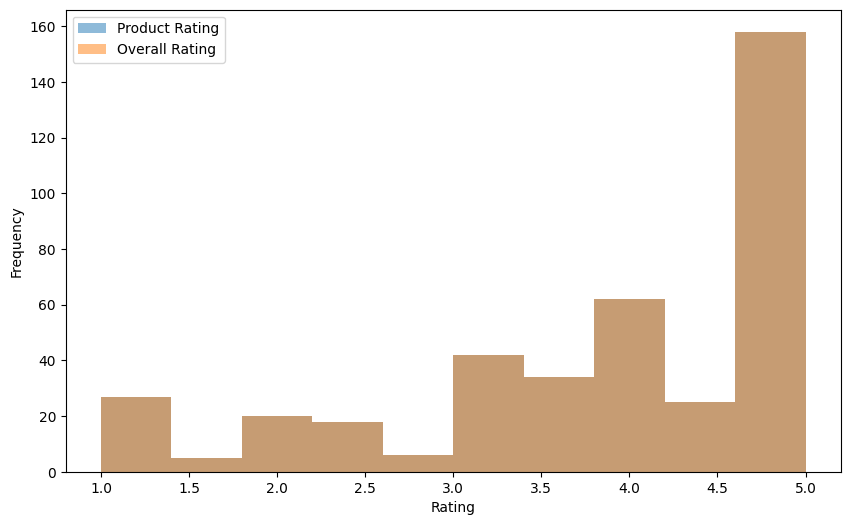

In [49]:
#product_rating and overall_rating
plt.figure(figsize=(10, 6))
plt.hist(df['product_rating'], bins=10, alpha=0.5, label='Product Rating')
plt.hist(df['overall_rating'], bins=10, alpha=0.5, label='Overall Rating')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.legend()
plt.show()

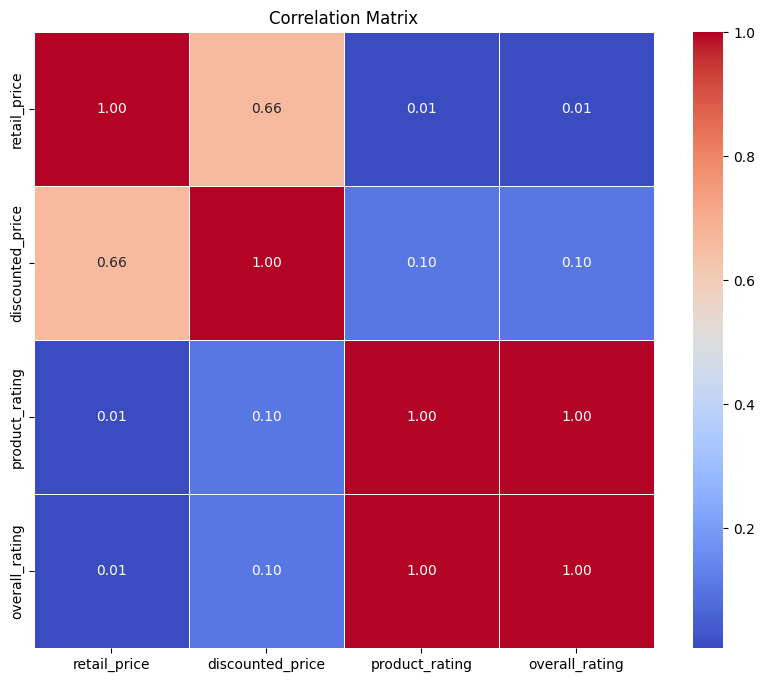

In [53]:
# Calculate the correlation matrix for numerical attributes
correlation_matrix = df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

Index(['retail_price', 'discounted_price', 'product_rating', 'overall_rating'], dtype='object')